# PCA - An example on Exploratory Data Analysis

In this notebook you will:

- Replicate Andrew's example on PCA
- Visualize how PCA works on a 2-dimensional small dataset and that not every projection is "good"
- Visualize how a 3-dimensional data can also be contained in a 2-dimensional subspace
- Use PCA to find hidden patterns in a high-dimensional dataset

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pca_utils import plot_widget
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
import matplotlib.pyplot as plt
import plotly.offline as py

In [2]:
py.init_notebook_mode()

In [4]:
output_notebook()

Loading BokehJS ...

## Lecture Example

We are going work on the same example that Andrew has shown in the lecture.

In [5]:
X = np.array([[ 99,  -1],
       [ 98,  -1],
       [ 97,  -2],
       [101,   1],
       [102,   1],
       [103,   2]])

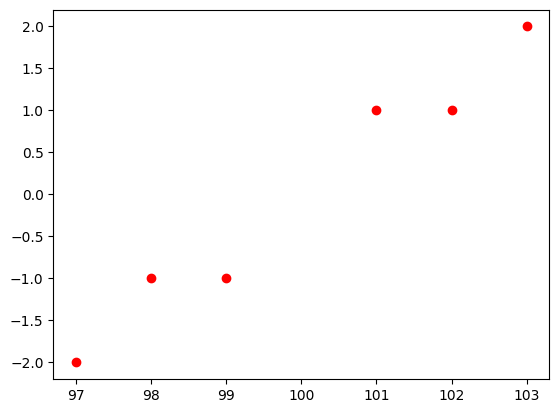

In [6]:
plt.plot(X[:,0], X[:,1], 'ro')

In [7]:
# Loading the PCA algorithm
pca_2 = PCA(n_components=2)
pca_2

PCA(n_components=2)

In [8]:
# Let's fit the data. We do not need to scale it, since sklearn's implementation already handles it.
pca_2.fit(X)

PCA(n_components=2)

In [9]:
pca_2.explained_variance_ratio_

array([0.99244289, 0.00755711])

The coordinates on the first principal component (first axis) are enough to retain 99.24% of the information ("explained variance").  The second principal component adds an additional 0.76% of the information ("explained variance") that is not stored in the first principal component coordinates.

In [10]:
X_trans_2 = pca_2.transform(X)
X_trans_2

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

Think of column 1 as the coordinate along the first principal component (the first new axis) and column 2 as the coordinate along the second principal component (the second new axis).

You can probably just choose the first principal component since it retains 99% of the information (explained variance).

In [11]:
pca_1 = PCA(n_components=1)
pca_1

PCA(n_components=1)

In [12]:
pca_1.fit(X)
pca_1.explained_variance_ratio_

array([0.99244289])

In [13]:
X_trans_1 = pca_1.transform(X)
X_trans_1

array([[ 1.38340578],
       [ 2.22189802],
       [ 3.6053038 ],
       [-1.38340578],
       [-2.22189802],
       [-3.6053038 ]])

Notice how this column is just the first column of `X_trans_2`.

If you had 2 features (two columns of data) and choose 2 principal components, then you'll keep all the information and the data will end up the same as the original.

In [14]:
X_reduced_2 = pca_2.inverse_transform(X_trans_2)
X_reduced_2

array([[ 99.,  -1.],
       [ 98.,  -1.],
       [ 97.,  -2.],
       [101.,   1.],
       [102.,   1.],
       [103.,   2.]])

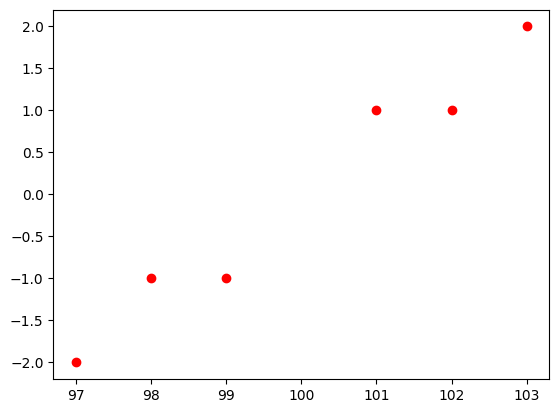

In [15]:
plt.plot(X_reduced_2[:,0], X_reduced_2[:,1], 'ro')

Reduce to 1 dimension instead of 2

In [16]:
X_reduced_1 = pca_1.inverse_transform(X_trans_1)
X_reduced_1

array([[ 98.84002499,  -0.75383654],
       [ 98.13695576,  -1.21074232],
       [ 96.97698075,  -1.96457886],
       [101.15997501,   0.75383654],
       [101.86304424,   1.21074232],
       [103.02301925,   1.96457886]])

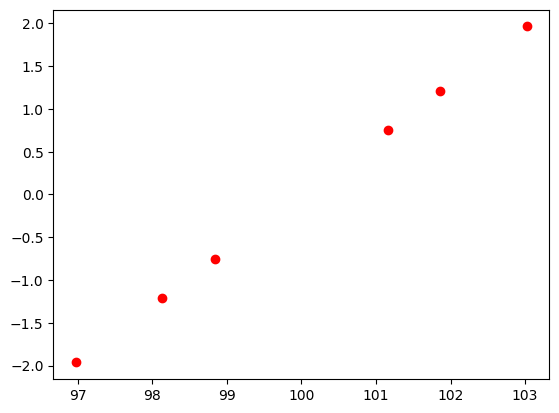

In [17]:
plt.plot(X_reduced_1[:,0], X_reduced_1[:,1], 'ro')

Notice how the data are now just on a single line (this line is the single principal component that was used to describe the data; and each example had a single "coordinate" along that axis to describe its location.

## Visualizing the PCA algorithm

Let's define $10$ points in the plane and use them as an example to visualize how we can compress this points in 1 dimension. You will see that there are good ways and bad ways.

In [18]:
X = np.array([[-0.83934975, -0.21160323],
       [ 0.67508491,  0.25113527],
       [-0.05495253,  0.36339613],
       [-0.57524042,  0.24450324],
       [ 0.58468572,  0.95337657],
       [ 0.5663363 ,  0.07555096],
       [-0.50228538, -0.65749982],
       [-0.14075593,  0.02713815],
       [ 0.2587186 , -0.26890678],
       [ 0.02775847, -0.77709049]])

In [19]:
p = figure(title = '10-point scatterplot', x_axis_label = 'x-axis', y_axis_label = 'y-axis') ## Creates the figure object
p.scatter(X[:,0],X[:,1],marker = 'o', color = '#C00000', size = 5) ## Add the scatter plot

## Some visual adjustments
p.grid.visible = False
p.grid.visible = False
p.outline_line_color = None 
p.toolbar.logo = None
p.toolbar_location = None
p.xaxis.axis_line_color = "#f0f0f0"
p.xaxis.axis_line_width = 5
p.yaxis.axis_line_color = "#f0f0f0"
p.yaxis.axis_line_width = 5

## Shows the figure
show(p)

The next code will generate a widget where you can see how different ways of compressing this data into 1-dimensional datapoints will lead to different ways on how the points are spread in this new space. The line generated by PCA is the line that keeps the points as far as possible from each other. 

You can use the slider to rotate the black line through its center and see how the points' projection onto the line will change as we rotate the line. 

You can notice that there are projections that place different points in almost the same point, and there are projections that keep the points as separated as they were in the plane.

In [22]:
plot_widget()

    'data': [{'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              …

## Visualization of a 3-dimensional dataset 

In this section we will see how some 3 dimensional data can be condensed into a 2 dimensional space. 

In [23]:
from pca_utils import random_point_circle, plot_3d_2d_graphs

In [24]:
X = random_point_circle(n = 150)

In [25]:
deb = plot_3d_2d_graphs(X)

In [26]:
deb.update_layout(yaxis2 = dict(title_text = 'test', visible=True))

## Using PCA in Exploratory Data Analysis

Let's load a toy dataset with $500$ samples and $1000$ features.

In [27]:
df = pd.read_csv("toy_dataset.csv")

In [28]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_990,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999
0,27.422157,-29.662712,-23.297163,-15.161935,0.345581,3.706750,-5.507209,-46.992476,5.175469,-47.768145,...,7.815960,24.320965,-33.987522,22.306088,31.173511,31.264830,8.380699,-25.843189,36.706408,-43.480792
1,3.489482,-19.153551,-14.636424,14.688258,20.114204,13.532852,34.298084,22.982509,37.938670,-35.648144,...,11.145527,-38.886603,44.579337,37.308519,29.560535,-10.643331,-6.499263,19.921666,-3.528982,31.068739
2,4.293509,22.691579,-1.045155,-8.740350,12.401082,31.362987,-18.831206,-35.384557,8.161430,-16.421762,...,48.190331,-0.503157,-21.740678,15.972237,1.122335,-45.473538,10.518065,-5.818320,-29.466301,-13.676685
3,-2.139348,23.158754,-26.241206,19.426465,9.472049,8.453948,0.637211,-26.675984,-43.823329,11.840874,...,-51.613076,13.278858,-44.179281,32.912282,4.805774,3.960836,-15.888356,61.384773,33.112334,5.088320
4,-35.251034,27.281816,-29.470282,-21.786865,11.806822,58.655133,5.375230,59.740676,-49.007717,-21.801155,...,0.010857,20.975655,-21.358371,18.709369,22.362477,41.214565,-7.217724,31.173870,37.097532,-27.509420


This is a dataset with $1000$ features.

Let's try to see if there is a pattern in the data. The following function will randomly sample 100 pairwise tuples (x,y) of features, so we can scatter-plot them.


In [29]:
def get_pairs(n = 100):
    from random import randint
    i = 0
    tuples = []
    while i < 100:
        x = df.columns[randint(0,999)]
        y = df.columns[randint(0,999)]
        while x == y or (x,y) in tuples or (y,x) in tuples:
            y = df.columns[randint(0,999)]
        tuples.append((x,y))
        i+=1
    return tuples
            

In [30]:
pairs = get_pairs()

Now let's plot them!

In [31]:
fig, axs = plt.subplots(10,10, figsize = (35,35))
i = 0
for rows in axs:
    for ax in rows:
        ax.scatter(df[pairs[i][0]],df[pairs[i][1]], color = "#C00000")
        ax.set_xlabel(pairs[i][0])
        ax.set_ylabel(pairs[i][1])
        i+=1

It looks like there is not much information hidden in pairwise features. Also, it is not possible to check every combination, due to the amount of features. Let's try to see the linear correlation between them.

In [ ]:
# This may take 1 minute to run
corr = df.corr()

In [ ]:
## This will show all the features that have correlation > 0.5 in absolute value. We remove the features 
## with correlation == 1 to remove the correlation of a feature with itself

mask = (abs(corr) > 0.5) & (abs(corr) != 1)
corr.where(mask).stack().sort_values()

The maximum and minimum correlation is around $0.631$ - $0.632$. This does not show too much as well. 

Let's try PCA decomposition to compress our data into a 2-dimensional subspace (plane) so we can plot it as scatter plot. 

In [ ]:
# Loading the PCA object
pca = PCA(n_components = 2) # Here we choose the number of components that we will keep.
X_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(X_pca, columns = ['principal_component_1','principal_component_2'])

In [ ]:
df_pca.head()

In [ ]:
plt.scatter(df_pca['principal_component_1'],df_pca['principal_component_2'], color = "#C00000")
plt.xlabel('principal_component_1')
plt.ylabel('principal_component_2')
plt.title('PCA decomposition')

This is great! We can see well defined clusters. 

In [ ]:
# pca.explained_variance_ration_ returns a list where it shows the amount of variance explained by each principal component.
sum(pca.explained_variance_ratio_)

And we preserved only around 14.6% of the variance!

Quite impressive! We can clearly see clusters in our data, something that we could not see before. How many clusters can you spot? 8, 10? 

If we run a PCA to plot 3 dimensions, we will get more information from data.


In [ ]:
pca_3 = PCA(n_components = 3).fit(df)
X_t = pca_3.transform(df)
df_pca_3 = pd.DataFrame(X_t,columns = ['principal_component_1','principal_component_2','principal_component_3'])

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter_3d(df_pca_3, x = 'principal_component_1', y = 'principal_component_2', z = 'principal_component_3').update_traces(marker = dict(color = "#C00000"))
fig.show()

In [ ]:
sum(pca_3.explained_variance_ratio_)

Now we preserved 19% of the variance and we can clearly see 10 clusters.

Congratulations on finishing this notebook!